In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data() #carregamento base de dados

x_train, x_test = x_train / 255.0, x_test / 255.0 #normaliznado em 0 até 1
y_train, y_test = y_train.flatten(), y_test.flatten() #deixando em um vetor

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3) (50000,) (10000,)


In [ ]:
K = len(set(y_train))
K

10

In [ ]:
i = Input(shape=x_train[0].shape) #camada de entrada com forma de 32x32x3

x = Conv2D(32, (3, 3), strides=2, activation='relu')(i) #primeira convolução
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x) #segunda
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x) #terceira

x = Flatten()(x) #deixando em apenas um vetor para a camada densa

x = Dropout(0.2)(x) #dropout para evitar overffiting
x = Dense(1024, activation='relu')(x) #camadad densa
x = Dropout(0.2)(x) #denovo, evitando overfitting

x = Dense(K, activation='softmax')(x) #camada de saída

model = Model(i, x)

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs = 5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 35ms/step - accuracy: 0.3669 - loss: 1.7007 - val_accuracy: 0.5572 - val_loss: 1.2292
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.5754 - loss: 1.1920 - val_accuracy: 0.6243 - val_loss: 1.0499
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.6467 - loss: 1.0011 - val_accuracy: 0.6483 - val_loss: 0.9967
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 37ms/step - accuracy: 0.6933 - loss: 0.8650 - val_accuracy: 0.6889 - val_loss: 0.9016
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 35ms/step - accuracy: 0.7343 - loss: 0.7451 - val_accuracy: 0.6909 - val_loss: 0.8890


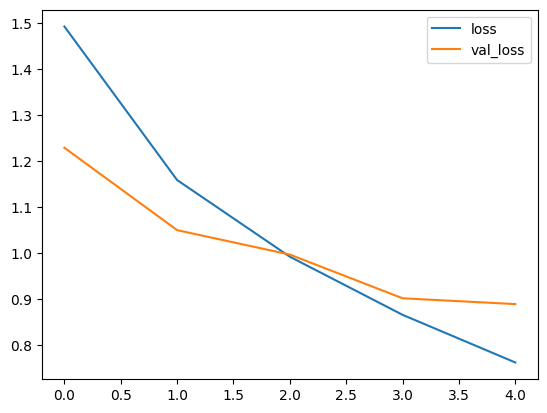

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

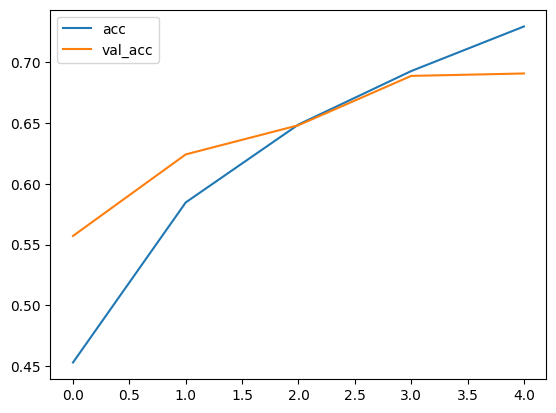

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
confusion matrix, without normalization
[[710  22  77  13  32   6  23  14  71  32]
 [ 15 864   8   3   6   3  13   6  21  61]
 [ 49  11 590  30  93  72 100  27  20   8]
 [ 15  12  82 351  97 188 169  51  16  19]
 [ 11   2  86  25 670  29  92  74   9   2]
 [  9   4  67 116  72 574  91  47  11   9]
 [  3   7  27  32  40   8 867   5   6   5]
 [ 14   6  45  22  79  63  16 741   2  12]
 [ 56  39  24  14  21   3  11   2 808  22]
 [ 36 122  10  11  10   6  15  25  31 734]]


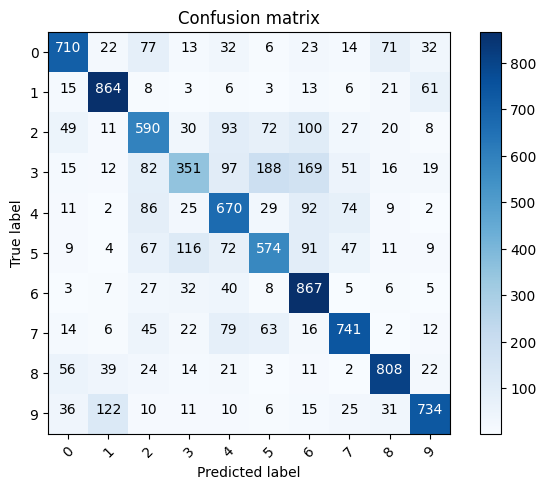

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False, # Se True, normaliza os valores
                          title='Confusion matrix',
                          cmap=plt.cm.Blues): # Mapa de cores usado no gráfico

    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
    else:
      print('confusion matrix, without normalization')

    print(cm)

    # Cria a visualização da matriz com cores
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar() # Adiciona a barra de cores
    tick_marks = np.arange(len(classes)) # Define a posição dos rótulos
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    # Adiciona os valores dentro de cada quadrado da matriz
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label') # Rótulo para eixo Y (classe real)
    plt.xlabel('Predicted label') # Rótulo para eixo X (classe prevista)
    plt.show()

p_test = model.predict(x_test).argmax(axis=1) # Faz as previsões com o modelo treinado e pega a classe com maior probabilidade

# Gera a matriz de confusão comparando os rótulos reais com os previstos
cm = confusion_matrix(y_test, p_test)

plot_confusion_matrix(cm, list(range(10)))

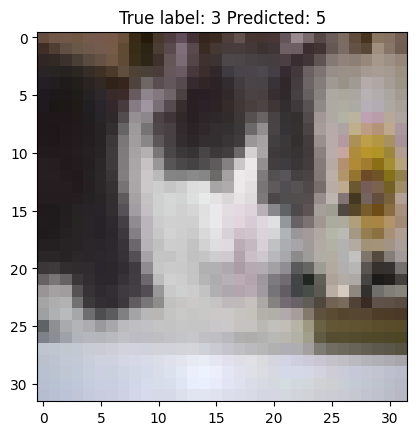

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0] # Encontra os índices das imagens que foram classificadas incorretamente
i = np.random.choice(misclassified_idx) # Escolhe aleatoriamente um dos índices dos erros
plt.imshow(x_test[i], cmap='gray') # Mostra a imagem que foi mal classificada
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));